# Project Summary

### Predicting Heart Disease

Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

### About:
* Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.
* In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:
* About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
* Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

### Problem description
Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:
* 0 represents no heart disease present
* 1 represents heart disease present

### 1) Dataset description

There are 15 columns in the dataset, where as follows
* patient_id: patient_id column is a unique and random identifier. 
* slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* resting_blood_pressure (type: int): resting blood pressure
* chest_pain_type (type: int): chest pain type (4 values)
* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
* oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* sex (type: binary): 0: female, 1: male
* age (type: int): age in years
* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

#### Target variable
* heart_disease_present: represents whether or not a patient has heart disease

### 2) Importing libraries

In [1]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# model validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

### 3) Loading Dataset

In [2]:
data = pd.read_csv('values.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


### 4) Basic checks 

In [4]:
data.shape

(180, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [6]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [7]:
# checking for null values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

so, there are no null values present in the dataset

In [8]:
# Dropping column Patient_id as it is an alphanumeric feature 
df=data.drop(columns=['patient_id'], axis=1)
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [9]:
# the total values in the target variable : heart_disease_present
df['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

In [10]:
df.heart_disease_present.unique()

array([0, 1], dtype=int64)

### 5) Exploratory data analysis by Visualization 

Text(0.5, 1.0, '0 : Patients not having a heart disease, 1: Patients having a heart disease')

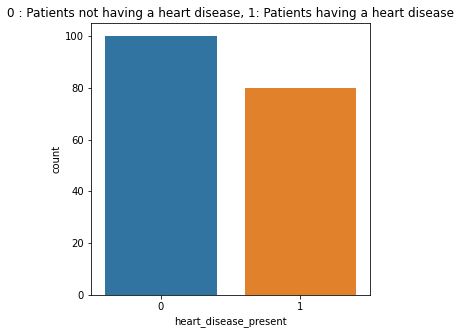

In [11]:
#  Visualize the number of patients having a heart disease and not having a heart disease
plt.figure(figsize=(5,5))
sns.countplot(df.heart_disease_present)
plt.title ("0 : Patients not having a heart disease, 1: Patients having a heart disease")

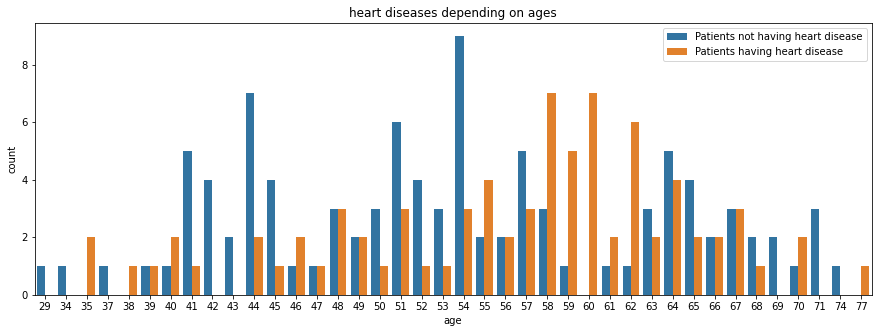

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='heart_disease_present', data=df)
plt.title("heart diseases depending on ages")
plt.legend(["Patients not having heart disease", "Patients having heart disease"], loc='upper right')

In [13]:
df.sex.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

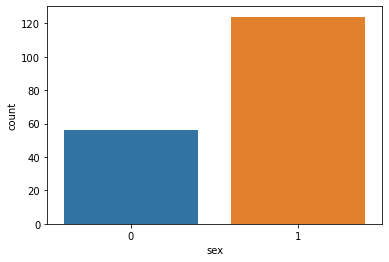

In [14]:
sns.countplot(df['sex'])

<AxesSubplot:xlabel='sex', ylabel='heart_disease_present'>

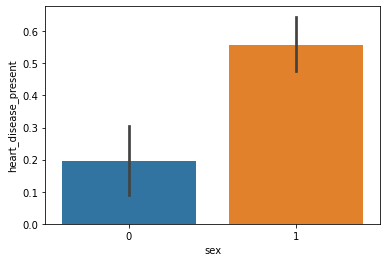

In [15]:
sns.barplot(df['sex'],df.heart_disease_present)

In [16]:
df.chest_pain_type.unique()

array([2, 3, 4, 1], dtype=int64)

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

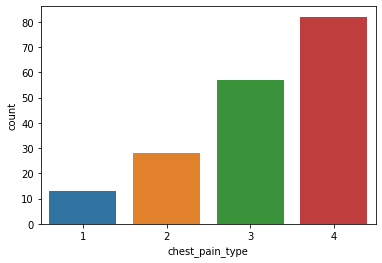

In [17]:
sns.countplot(df['chest_pain_type'])

<AxesSubplot:xlabel='chest_pain_type', ylabel='heart_disease_present'>

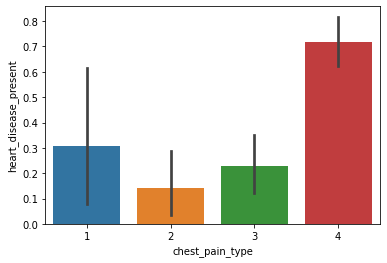

In [18]:
sns.barplot(df['chest_pain_type'],df.heart_disease_present)

In [19]:
df.fasting_blood_sugar_gt_120_mg_per_dl.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='count'>

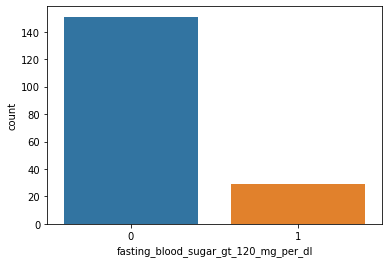

In [20]:
sns.countplot(df['fasting_blood_sugar_gt_120_mg_per_dl'])

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='heart_disease_present'>

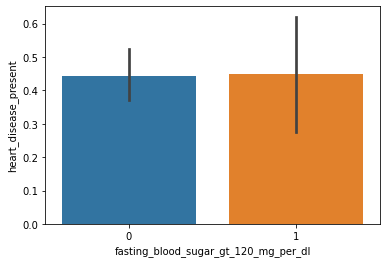

In [21]:
sns.barplot(df['fasting_blood_sugar_gt_120_mg_per_dl'],df.heart_disease_present)

In [22]:
df.resting_ekg_results.unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='resting_ekg_results', ylabel='count'>

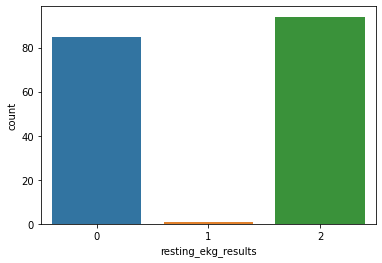

In [23]:
sns.countplot(df['resting_ekg_results'])

<AxesSubplot:xlabel='resting_ekg_results', ylabel='heart_disease_present'>

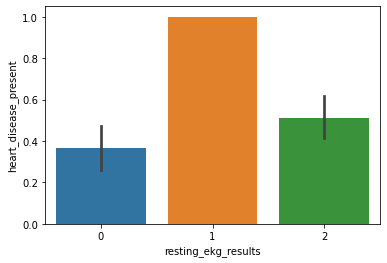

In [24]:
sns.barplot(df['resting_ekg_results'],df.heart_disease_present)

In [25]:
df.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='count'>

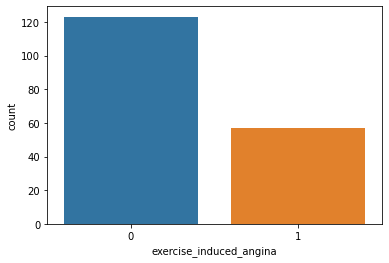

In [26]:
sns.countplot(df['exercise_induced_angina'])

<AxesSubplot:xlabel='exercise_induced_angina', ylabel='heart_disease_present'>

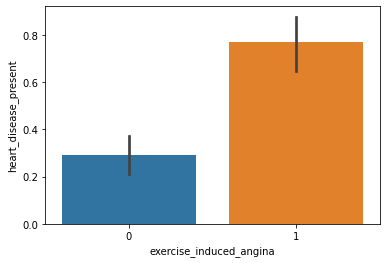

In [27]:
sns.barplot(df['exercise_induced_angina'],df.heart_disease_present)

In [28]:
df.slope_of_peak_exercise_st_segment.unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='slope_of_peak_exercise_st_segment', ylabel='count'>

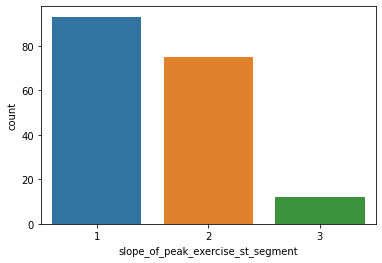

In [29]:
sns.countplot(df['slope_of_peak_exercise_st_segment'])

<AxesSubplot:xlabel='slope_of_peak_exercise_st_segment', ylabel='heart_disease_present'>

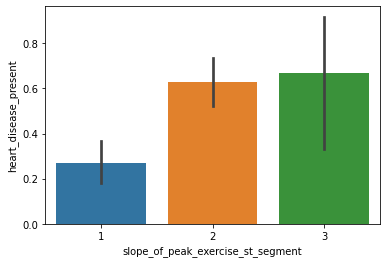

In [30]:
sns.barplot(df['slope_of_peak_exercise_st_segment'],df.heart_disease_present)

In [31]:
df.num_major_vessels.unique()

array([0, 3, 2, 1], dtype=int64)

<AxesSubplot:xlabel='num_major_vessels', ylabel='count'>

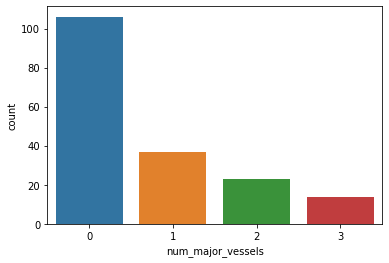

In [32]:
sns.countplot(df['num_major_vessels'])

<AxesSubplot:xlabel='num_major_vessels', ylabel='heart_disease_present'>

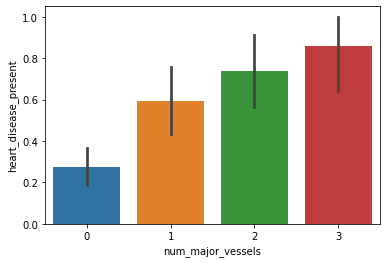

In [33]:
sns.barplot(df['num_major_vessels'],df.heart_disease_present)

In [34]:
## Encoding categorical varible
df.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [35]:
enc = LabelEncoder()
df.thal = enc.fit_transform(df.thal)

In [36]:
df.thal.unique()

array([1, 2, 0])

<AxesSubplot:xlabel='thal', ylabel='count'>

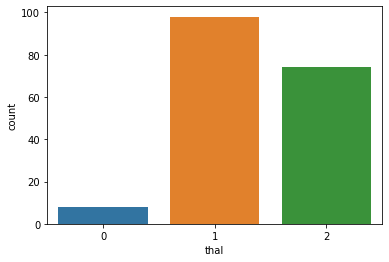

In [37]:
sns.countplot(df['thal'])

<AxesSubplot:xlabel='thal', ylabel='heart_disease_present'>

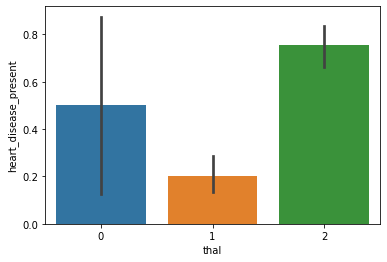

In [38]:
sns.barplot(df['thal'],df.heart_disease_present)

<AxesSubplot:>

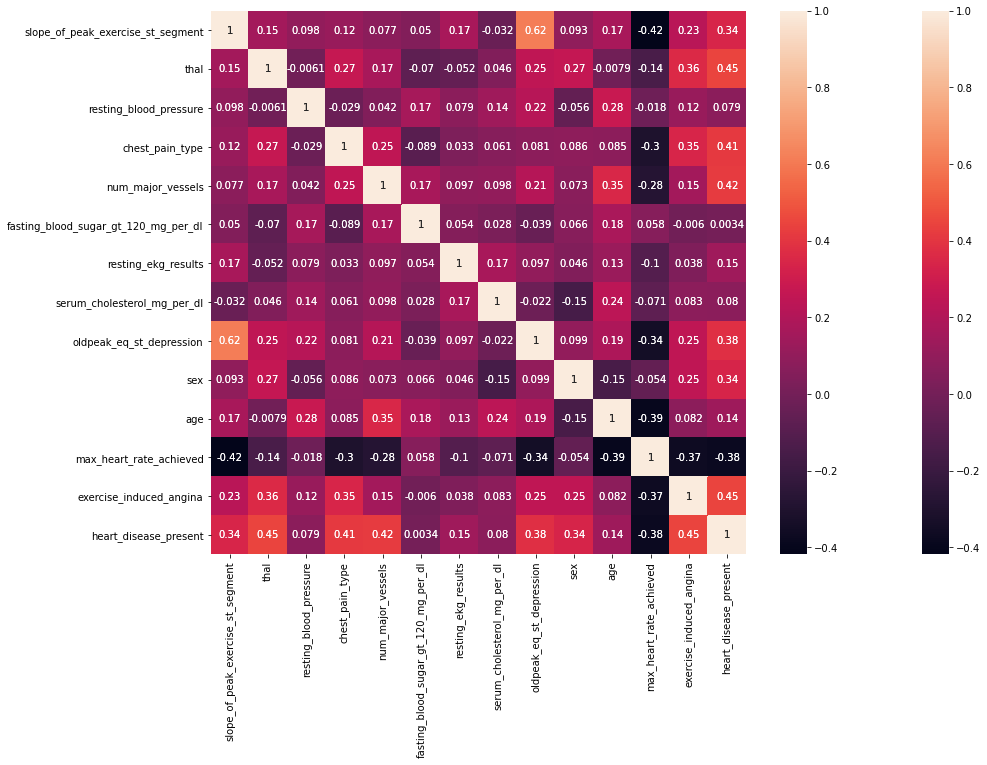

In [39]:
# Checking Correlation between all features 
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

### 6) Outlier Detection & Removal

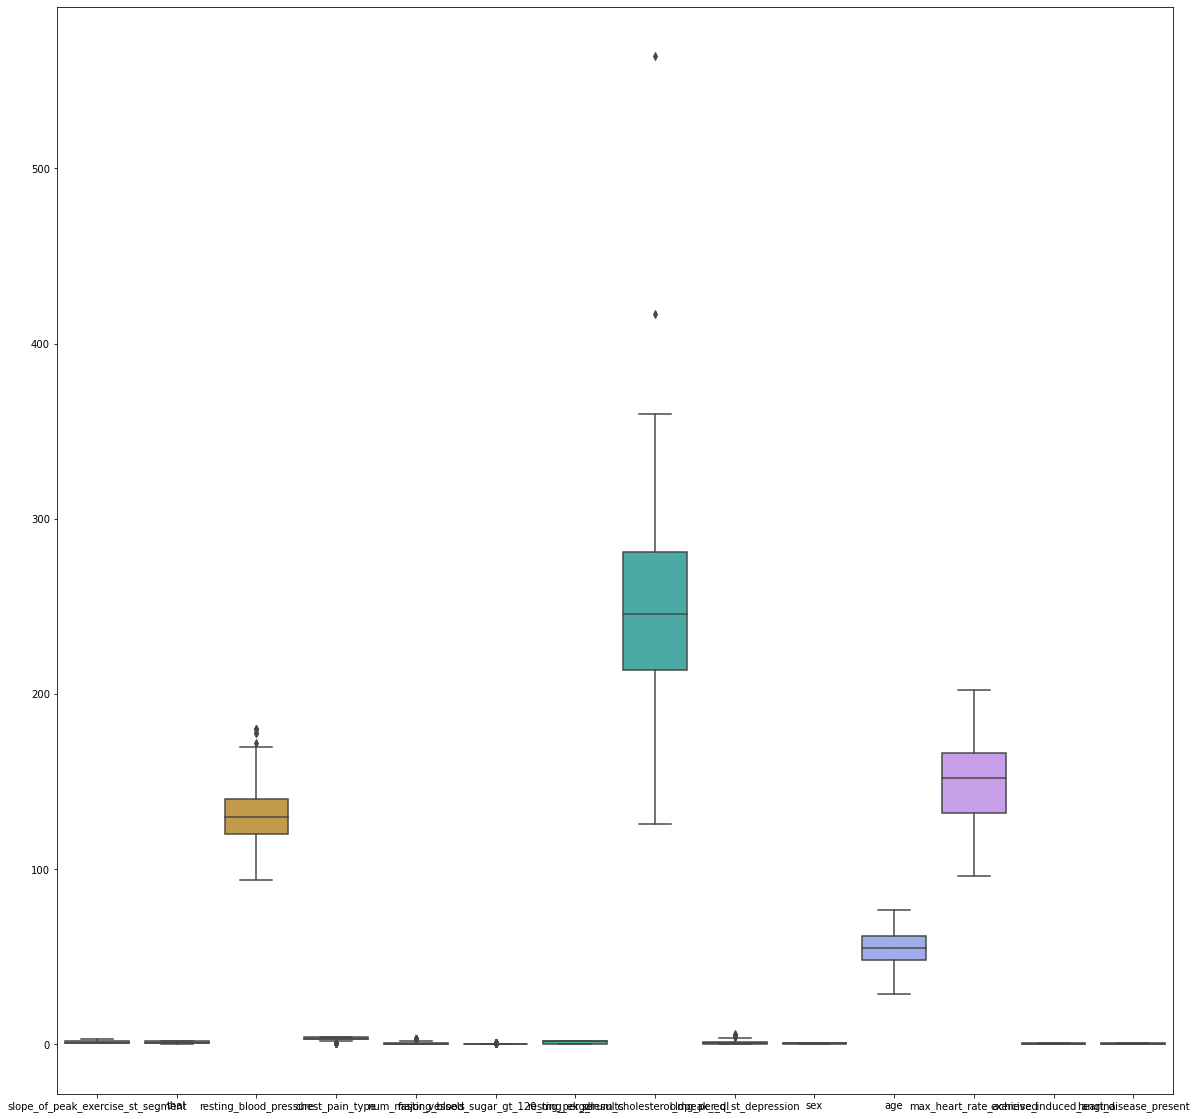

In [40]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

<AxesSubplot:>

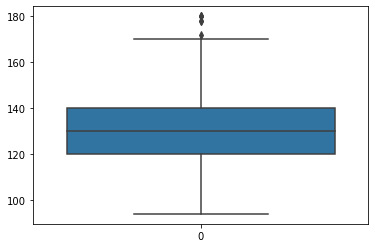

In [41]:
sns.boxplot(data=df['resting_blood_pressure'])

<AxesSubplot:>

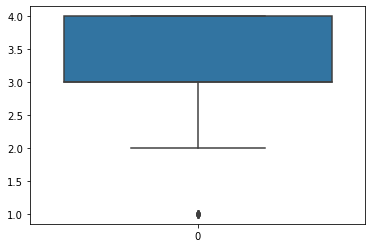

In [42]:
sns.boxplot(data=df['chest_pain_type'])

<AxesSubplot:>

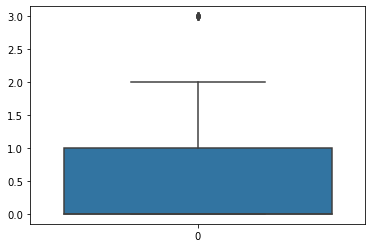

In [43]:
sns.boxplot(data=df['num_major_vessels'])

<AxesSubplot:>

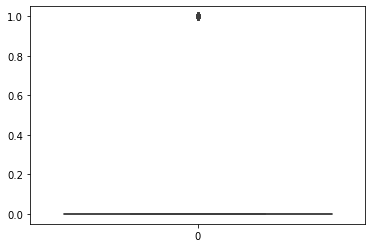

In [44]:
sns.boxplot(data=df['fasting_blood_sugar_gt_120_mg_per_dl'])

<AxesSubplot:>

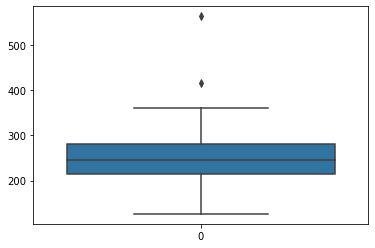

In [45]:
sns.boxplot(data=df['serum_cholesterol_mg_per_dl'])

<AxesSubplot:>

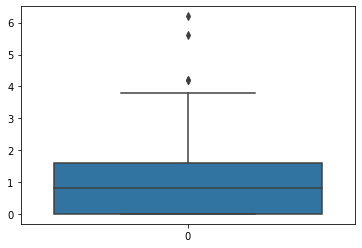

In [46]:
sns.boxplot(data=df['oldpeak_eq_st_depression'])

In [47]:
from scipy import stats
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df))
print(z)

[[0.89124111 0.64705882 0.19519463 ... 0.93248505 0.68074565 0.89442719]
 [0.72919727 0.64705882 1.25631978 ... 0.38708356 0.68074565 0.89442719]
 [0.89124111 0.64705882 0.37204882 ... 0.56888406 1.46897745 1.11803399]
 ...
 [0.72919727 1.11764706 0.37204882 ... 0.8400698  1.46897745 1.11803399]
 [0.89124111 0.64705882 0.43100022 ... 1.15973567 0.68074565 0.89442719]
 [0.89124111 0.64705882 1.69125009 ... 0.61433418 0.68074565 0.89442719]]


In [48]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z > 3))

(array([ 43,  60, 140, 162], dtype=int64), array([7, 7, 8, 8], dtype=int64))


In [49]:
# filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]

# checking shape of dataset after outlier removal
df.shape

(176, 14)

### Choosing input and output

In [50]:
X = df.drop(columns=['heart_disease_present'], axis=1)
y = df['heart_disease_present']

###  Splitting the data into training data and test data

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

## 7) Model Building

### 1) Random Forest Classifier

In [54]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_predict = model_rfc.predict(X_test)
accuracy_score(y_test,y_predict)

0.8863636363636364

In [55]:
print(classification_report(y_test,y_predict))
confusion_matrix(y_test,y_predict) 

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        28
           1       0.79      0.94      0.86        16

    accuracy                           0.89        44
   macro avg       0.87      0.90      0.88        44
weighted avg       0.90      0.89      0.89        44



array([[24,  4],
       [ 1, 15]], dtype=int64)

### 2) XG-Boost Classifier

In [58]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
y_predict = model_xgb.predict(X_test)
accuracy_score(y_test,y_predict)

[13:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8636363636363636

In [59]:
print(classification_report(y_test,y_predict))
confusion_matrix(y_test,y_predict) 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.81      0.81      0.81        16

    accuracy                           0.86        44
   macro avg       0.85      0.85      0.85        44
weighted avg       0.86      0.86      0.86        44



array([[25,  3],
       [ 3, 13]], dtype=int64)

### 3) Logistic Regression

In [60]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
accuracy_score(y_test,y_predict)

0.9772727272727273

In [61]:
print(classification_report(y_test,y_predict))
confusion_matrix(y_test,y_predict) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.94      0.97        16

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



array([[28,  0],
       [ 1, 15]], dtype=int64)

### Findings
* As you can see from above results, Logistic regression is best performer as it has the highest test accuracy of 0.972

## 8) Roc_Auc Curve

In [62]:
pd.crosstab(y_test,y_predict)

col_0,0,1
heart_disease_present,,
0,28,0
1,1,15


In [63]:
from collections import Counter
Counter(y_predict)

Counter({1: 15, 0: 29})

In [64]:
Counter(y_test)

Counter({1: 16, 0: 28})

In [65]:
model_lr.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [66]:
model_lr.predict_proba(X_test)

array([[0.02322162, 0.97677838],
       [0.95561204, 0.04438796],
       [0.79566561, 0.20433439],
       [0.74688451, 0.25311549],
       [0.7588464 , 0.2411536 ],
       [0.17260203, 0.82739797],
       [0.82735976, 0.17264024],
       [0.10515916, 0.89484084],
       [0.94011445, 0.05988555],
       [0.25285508, 0.74714492],
       [0.87801933, 0.12198067],
       [0.60004595, 0.39995405],
       [0.09255536, 0.90744464],
       [0.9572781 , 0.0427219 ],
       [0.04155076, 0.95844924],
       [0.89582773, 0.10417227],
       [0.32170755, 0.67829245],
       [0.58232564, 0.41767436],
       [0.88639732, 0.11360268],
       [0.89250658, 0.10749342],
       [0.95194294, 0.04805706],
       [0.88794499, 0.11205501],
       [0.12759567, 0.87240433],
       [0.84837741, 0.15162259],
       [0.01428317, 0.98571683],
       [0.88811118, 0.11188882],
       [0.75525373, 0.24474627],
       [0.36852597, 0.63147403],
       [0.9711454 , 0.0288546 ],
       [0.35334137, 0.64665863],
       [0.

In [67]:
def predict_threshold(model_lr,X_test,thresholds):
    return np.where(model_lr.predict_proba(X_test)[:,1]>thresholds,1,0)

In [68]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [69]:
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_lr,X_test,thr)
    print("Thresholds :",thr)
    print(confusion_matrix(y_test,y_predict))

Thresholds : 0.0
[[ 0 28]
 [ 0 16]]
Thresholds : 0.1
[[11 17]
 [ 0 16]]
Thresholds : 0.2
[[20  8]
 [ 1 15]]
Thresholds : 0.30000000000000004
[[25  3]
 [ 1 15]]
Thresholds : 0.4
[[27  1]
 [ 1 15]]
Thresholds : 0.5
[[28  0]
 [ 1 15]]
Thresholds : 0.6000000000000001
[[28  0]
 [ 3 13]]
Thresholds : 0.7000000000000001
[[28  0]
 [ 6 10]]
Thresholds : 0.8
[[28  0]
 [ 8  8]]
Thresholds : 0.9
[[28  0]
 [11  5]]
Thresholds : 1.0
[[28  0]
 [16  0]]


In [70]:
tpr,fpr,thresholds = roc_curve(y_test,model_lr.predict_proba(X_test)[:,1])

In [71]:
model_lr.predict_proba(X_test)

array([[0.02322162, 0.97677838],
       [0.95561204, 0.04438796],
       [0.79566561, 0.20433439],
       [0.74688451, 0.25311549],
       [0.7588464 , 0.2411536 ],
       [0.17260203, 0.82739797],
       [0.82735976, 0.17264024],
       [0.10515916, 0.89484084],
       [0.94011445, 0.05988555],
       [0.25285508, 0.74714492],
       [0.87801933, 0.12198067],
       [0.60004595, 0.39995405],
       [0.09255536, 0.90744464],
       [0.9572781 , 0.0427219 ],
       [0.04155076, 0.95844924],
       [0.89582773, 0.10417227],
       [0.32170755, 0.67829245],
       [0.58232564, 0.41767436],
       [0.88639732, 0.11360268],
       [0.89250658, 0.10749342],
       [0.95194294, 0.04805706],
       [0.88794499, 0.11205501],
       [0.12759567, 0.87240433],
       [0.84837741, 0.15162259],
       [0.01428317, 0.98571683],
       [0.88811118, 0.11188882],
       [0.75525373, 0.24474627],
       [0.36852597, 0.63147403],
       [0.9711454 , 0.0288546 ],
       [0.35334137, 0.64665863],
       [0.

In [72]:
tpr

array([0.        , 0.        , 0.        , 0.28571429, 0.28571429,
       1.        ])

In [73]:
fpr

array([0.    , 0.0625, 0.9375, 0.9375, 1.    , 1.    ])

In [74]:
thresholds

array([1.98571683, 0.98571683, 0.56794138, 0.20433439, 0.17264024,
       0.0288546 ])

In [75]:
model_lr.predict_proba(X_test)[:,1]

array([0.97677838, 0.04438796, 0.20433439, 0.25311549, 0.2411536 ,
       0.82739797, 0.17264024, 0.89484084, 0.05988555, 0.74714492,
       0.12198067, 0.39995405, 0.90744464, 0.0427219 , 0.95844924,
       0.10417227, 0.67829245, 0.41767436, 0.11360268, 0.10749342,
       0.04805706, 0.11205501, 0.87240433, 0.15162259, 0.98571683,
       0.11188882, 0.24474627, 0.63147403, 0.0288546 , 0.64665863,
       0.10429653, 0.38465767, 0.05280628, 0.042678  , 0.56794138,
       0.27220961, 0.04890484, 0.05068417, 0.97637883, 0.03646458,
       0.58939101, 0.0579714 , 0.77399894, 0.10860524])

In [76]:
auc = roc_auc_score(y_test,model_lr.predict_proba(X_test)[:,1])
auc

0.9821428571428572

ROC-AUC_SCORE 0.9821428571428572


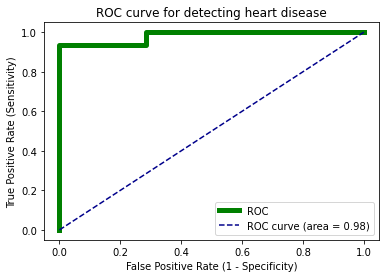

In [77]:
y_predict = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for detecting heart disease')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5,label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.legend()
print("ROC-AUC_SCORE",roc_auc_score(y_test,y_predict))
plt.show()

### 9) Save model & Predictions

In [78]:
import joblib 
joblib.dump(model_lr,'HD_trained_model_lr.pkl')

['HD_trained_model_lr.pkl']

In [79]:
nj = joblib.load('HD_trained_model_lr.pkl')
nj

LogisticRegression()

In [82]:
nj.predict([[1,1,128,2,0,0,2,308,0.0,1,45,170,0]])

if(nj.predict([[1,1,128,2,0,0,2,308,0.0,1,45,170,0]])==0):
    print("The patient has Heart Disease : NO")
else:
    print("The patient has Heart Disease : YES")

The patient has Heart Disease : NO


In [83]:
nj.predict([[2,2,144,4,0,0,2,200,0.9,1,50,126,1]])

if(nj.predict([[2,2,144,4,0,0,2,200,0.9,1,50,126,1]])==0):
    print("The patient has Heart Disease : NO")
else:
    print("The patient has Heart Disease : YES")

The patient has Heart Disease : YES
